### Objective: Create a linear regression model to predict disease progression based on BMI.

### Get the Data
* Load the diabetes dataset using Scikit-Learn.

In [49]:
from sklearn import datasets
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

### Initialling sklearn, numpy, pandas and matplotlib plt

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

### Explore the Data
* Dataset Information
* First few rows of the dataset
* Summary statistics
* Visualize the data 

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  Target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB
None

First Few Rows of the Dataset:
        age       sex       bmi        bp        s1        s2        s3   
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401  \
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0

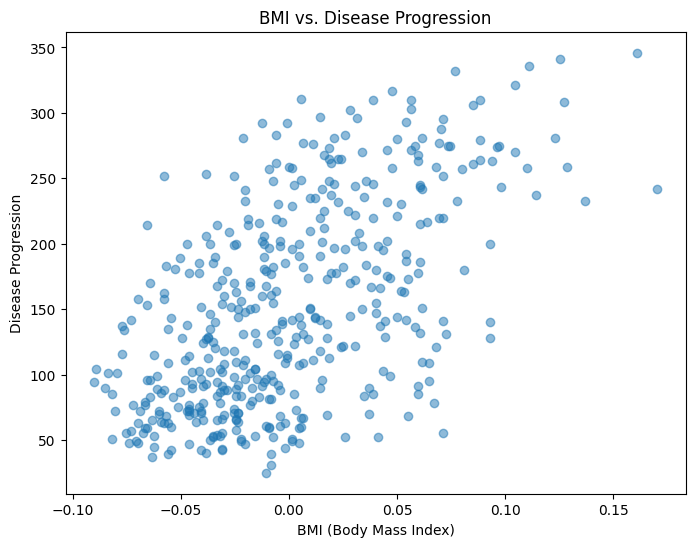

In [51]:
diabetes_df = pd.DataFrame(data=diabetes_X, columns=datasets.load_diabetes().feature_names)
diabetes_df['Target'] = diabetes_y

# Information about the dataset
print("Dataset Information:")
print(diabetes_df.info())

# First few rows of the dataset
print("\nFirst Few Rows of the Dataset:")
print(diabetes_df.head())

# Summary statistics
print("\nSummary Statistics:")
print(diabetes_df.describe())

# Visualize the data
import matplotlib.pyplot as plt

# scatter plot of BMI vs. Target (disease progression)
plt.figure(figsize=(8, 6))
plt.scatter(diabetes_df['bmi'], diabetes_df['Target'], alpha=0.5)
plt.title('BMI vs. Disease Progression')
plt.xlabel('BMI (Body Mass Index)')
plt.ylabel('Disease Progression')
plt.show()

In [52]:
# Use only one feature (BMI)  
diabetes_X = diabetes_X[:, np.newaxis, 2]


In [53]:
# Define the desired split ratio (e.g., 80% training, 20% testing)
split_ratio = 0.8

# Calculate the split index based on the ratio
split_index = int(len(diabetes_X) * split_ratio)
print(f"Training rows count (80% of whole data) : {split_index}")

# Split the data into training and test sets
X_train = diabetes_X[:split_index]
X_test = diabetes_X[split_index:]
y_train = diabetes_y[:split_index]
y_test = diabetes_y[split_index:]


Training rows count (80% of whole data) : 353


### Solution - using Linear Regression

In [54]:
regr = LinearRegression()
regr.fit(X_train,y_train)

# Make predictions on the test set
y_pred = regr.predict(X_test)

# Model parameters
slope = regr.coef_[0]
intercept = regr.intercept_

# Calculate the mean squared error on both train and test sets
mse_train = mean_squared_error(y_train, regr.predict(X_train))
mse_test = mean_squared_error(y_test, y_pred)

### Presenting the solution with graphs.

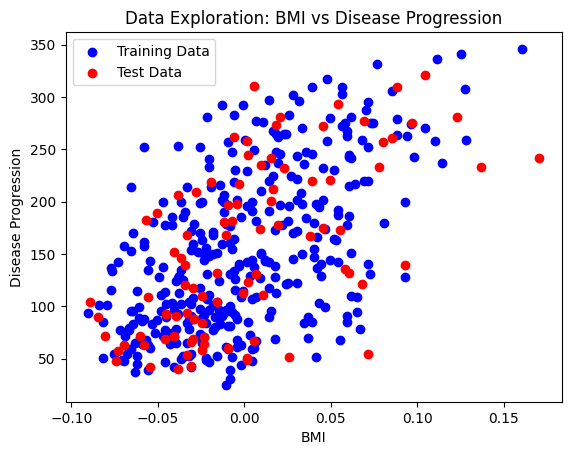

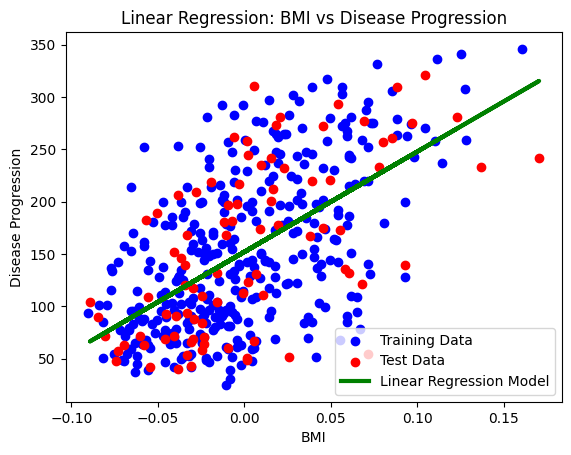

Linear Regression Model Parameters:
Slope (Coefficient): 957.76
Intercept: 152.05
Mean Squared Error (Training): 3842.92
Mean Squared Error (Test): 4079.82


In [55]:
# Data Exploration (Concise)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Data Exploration: BMI vs Disease Progression')
plt.legend()
plt.show()

# Presentation of Linear Regression Results
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_test, y_pred, color='green', linewidth=3, label='Linear Regression Model')
plt.xlabel('BMI')
plt.ylabel('Disease Progression')
plt.title('Linear Regression: BMI vs Disease Progression')
plt.legend()
plt.show()

# Print the model's parameters and Mean Squared Errors
print(f'Linear Regression Model Parameters:')
print(f'Slope (Coefficient): {regr.coef_[0]:.2f}')
print(f'Intercept: {regr.intercept_:.2f}')
print(f'Mean Squared Error (Training): {mse_train:.2f}')
print(f'Mean Squared Error (Test): {mse_test:.2f}')